In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\7.xor.csv", header=None)
df

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0
...,...,...,...
495,0.441033,0.178793,-1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,-1.0
498,-0.198399,0.094192,1.0


In [3]:
df.shape

(500, 3)

In [4]:
df[[0,1]]

,0,1
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599
...,...,...
495,0.441033,0.178793
496,-0.799422,0.240788
497,0.289121,0.412871
498,-0.198399,0.094192


<AxesSubplot:xlabel='0', ylabel='1'>

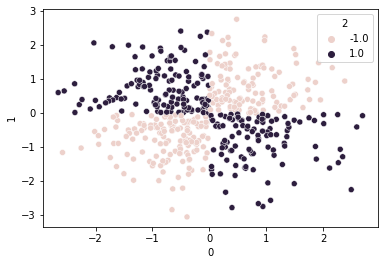

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2)

In [7]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [9]:
# Implement Neural Networks for classification task and decision boundary
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:

model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 2)) # No.of Neurons
model.add(Dense(8,activation = 'relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [11]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
save = model.fit(x_train, y_train, epochs = 300, validation_split= 0.2)

Epoch 1/300
10/10 [==============================] - 1s 25ms/step - loss: 0.7785 - accuracy: 0.4625 - val_loss: 0.8139 - val_accuracy: 0.3250
Epoch 2/300
10/10 [==============================] - 0s 6ms/step - loss: 0.7385 - accuracy: 0.4094 - val_loss: 0.7698 - val_accuracy: 0.3000
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 0.7139 - accuracy: 0.3656 - val_loss: 0.7392 - val_accuracy: 0.2375
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.3250 - val_loss: 0.7174 - val_accuracy: 0.1750
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.2812 - val_loss: 0.6978 - val_accuracy: 0.1500
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.2438 - val_loss: 0.6824 - val_accuracy: 0.1375
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.2219 - val_loss: 0.6678 - val_accuracy: 0.1250
Epoch 8/300


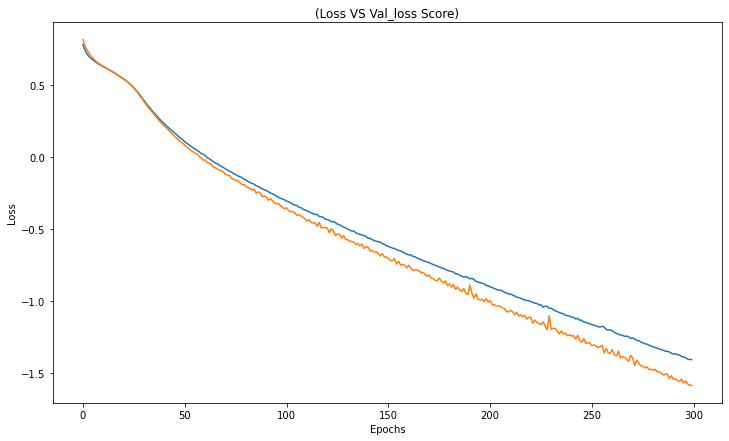

In [13]:
# history.history['loss'], history.history['val_loss'] 
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [15]:
y_capf=np.where(y_pred>0.5,1,0)


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.46

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

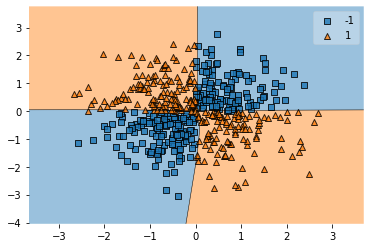

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 5s 1ms/step


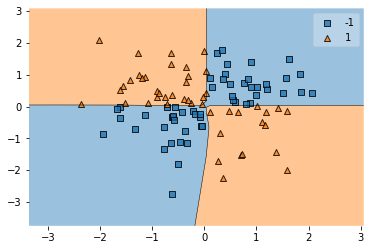

In [19]:
plot_decision_regions(x_test, y_test.values.astype(int), clf = model);
